In [261]:
##importar bibliotecas
import pandas as pd                 
import numpy as np
#Para a árvore de decisão
from sklearn import tree            
from sklearn.metrics import classification_report, confusion_matrix
#plotagem
import pydotplus         
from IPython.display import Image  
#carregar dataset
import glob                        
from google.colab import files     
#temporizador
import time
from functools import wraps

In [ ]:
#para carregar novo arquivo 
uploaded = files.upload() 
for fn in uploaded.keys():            
  start_time = time.time()
  all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
#combinar todos os arquivos na lista
start_time = time.time()
BD_csv = pd.concat([pd.read_csv(f, sep=';') for f in all_filenames ])
time_Dataset = time.time() - start_time

In [ ]:
#carregar base de dados ja existente 
start_time = time.time()
BD_csv = pd.read_csv("TcaixasALP.csv", delimiter =';')
time_Dataset = time.time() - start_time

In [263]:
#calculando volume 
start_time = time.time()
a = BD_csv.iloc[:,0].values
l = BD_csv.iloc[:,1].values
p = BD_csv.iloc[:,2].values
v = a*l*p
BD_csv.insert(loc=4, column='volume', value = v)
time_volume = time.time() - start_time

In [264]:
#atribuido colunas do DataFrame para os algoritmo
start_time = time.time()
X= BD_csv[['volume']]
y = BD_csv[['Saida']]
time_data = time.time() - start_time

In [265]:
# O classificador da árvore de decisão.
start_time = time.time()
DTC = tree.DecisionTreeClassifier(random_state=1986,criterion='gini', max_depth=3)
time_DTC = time.time() - start_time

In [266]:
# Treinando a árvore de decisão
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
DTC_train = DTC.fit(X_train,  y_train)
time_Train_Test_sets = time.time() - start_time

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Saida <= 29967.0\ngini = 0.66\nsamples = 140\nvalue = [52, 43, 45]\nclass = grande", fillcolor="#fdf6f0"] ;
1 [label="Saida <= 1348.0\ngini = 0.5\nsamples = 88\nvalue = [0, 43, 45]\nclass = pequena", fillcolor="#f9f6fe"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Saida <= 330.0\ngini = 0.08\nsamples = 47\nvalue = [0, 2, 45]\nclass = pequena", fillcolor="#8742e6"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = pequena", fillcolor="#8139e5"] ;
2 -> 3 ;
4 [label="gini = 0.41\nsamples = 7\nvalue = [0, 2, 5]\nclass = pequena", fillcolor="#b388ef"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = media", fillcolor="#39e581"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 52\nvalue = [52, 0, 0]\nclass = grande", fillcolor="#e58139"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headla

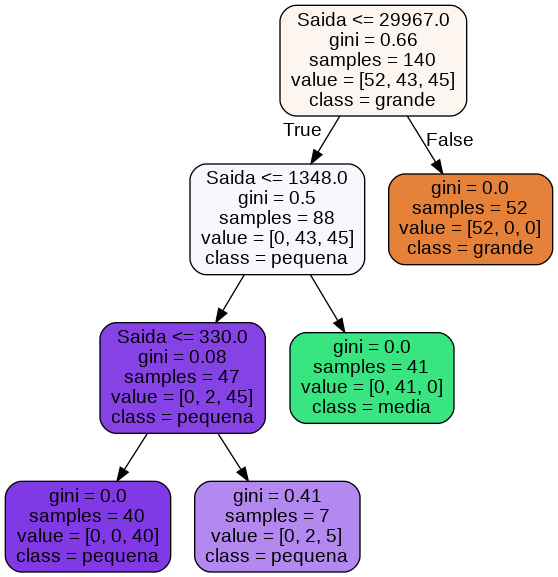

In [267]:
start_time = time.time()
#Imprimir uma árvore de decisão no formato DOT.
print(tree.export_graphviz(DTC_train, out_file=None, feature_names=list(BD_csv[['Saida']]),class_names=['grande', 'media', 'pequena'], rounded=True, filled=True,precision=2))
#Criar dados de ponto
dot_data = tree.export_graphviz(DTC_train, out_file=None, feature_names=list(BD_csv[['Saida']]),class_names=['grande', 'media', 'pequena'], rounded=True, filled=True,precision=2)
#Criar gráfico a partir de dados do DOT
graph = pydotplus.graph_from_dot_data(dot_data)
time_graph = time.time() - start_time
# Mostrar gráfico
Image(graph.create_png())

In [268]:
#predição do teste
start_time = time.time()
prediction = DTC.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
time_prediction = time.time() - start_time

              precision    recall  f1-score   support

      grande       1.00      1.00      1.00        20
       media       1.00      1.00      1.00        19
     pequena       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [271]:
#tempo de cada execução do algoritmo
print("Load Dataset:                                %.4f" % time_Dataset, "segundos.")
print("calculating volume:                          %.4f" % time_volume, "segundos.")
print("assigned DataFrame columns to the algorithm: %.4f" % time_data, "segundos.")
print("DecisionTreeClassifier:                      %.4f" % time_DTC, "segundos.")
print("Split Train Test sets:                       %.4f" % time_Train_Test_sets, "segundos.")
print("Print a decision tree:                       %.4f" % time_graph, "segundos.")
print("prediction Test:                             %.4f" % time_prediction, "segundos.")


Load Dataset:                                0.0077 segundos.
calculating volume:                          0.0020 segundos.
assigned DataFrame columns to the algorithm: 0.0045 segundos.
DecisionTreeClassifier:                      0.0001 segundos.
Split Train Test sets:                       0.0051 segundos.
Print a decision tree:                       0.0618 segundos.
prediction Test:                             0.0122 segundos.
